In [1]:
# ***********************************************
# KINETIC ELECTRONS: SCAN on EP concentration ***
# ***********************************************

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib notebook

In [3]:
run main_NLED31213

<IPython.core.display.Javascript object>


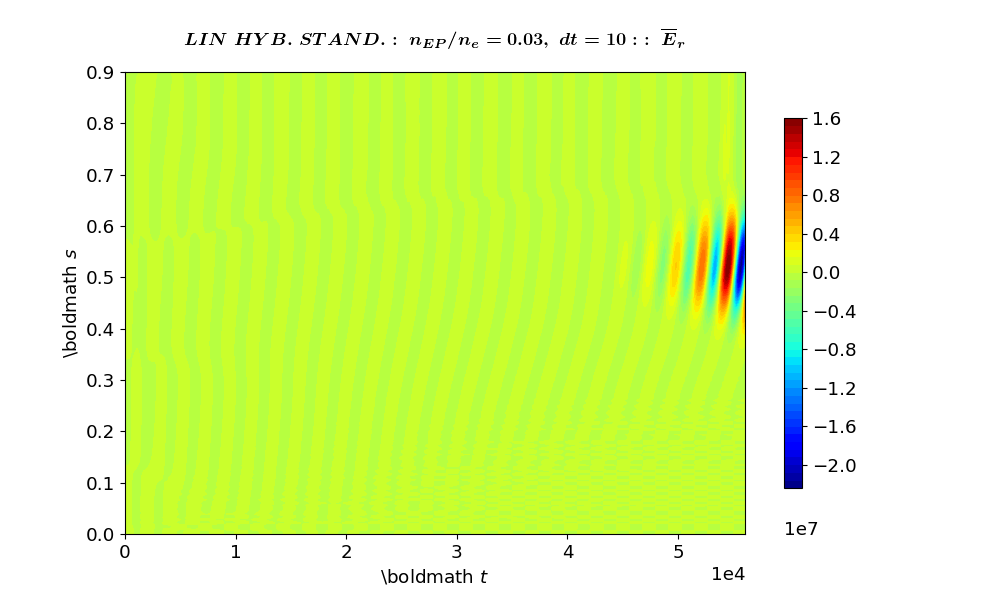

<IPython.core.display.Javascript object>


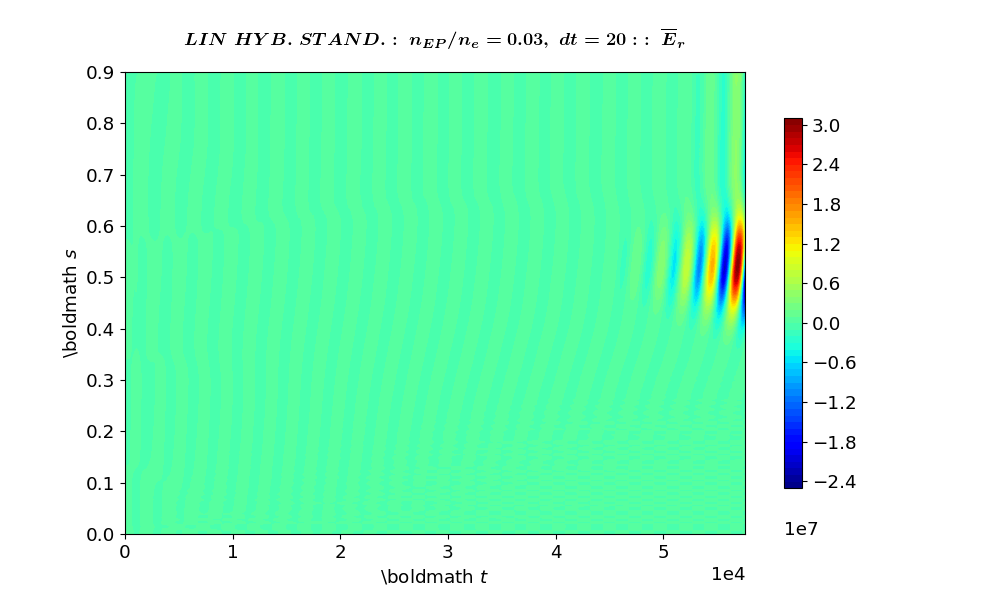

<IPython.core.display.Javascript object>


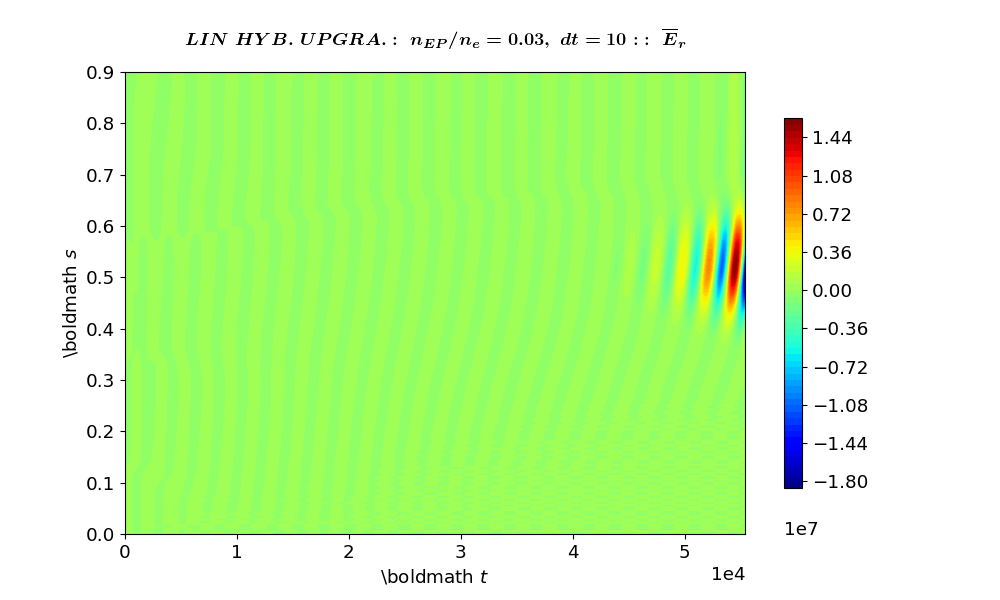

<IPython.core.display.Javascript object>


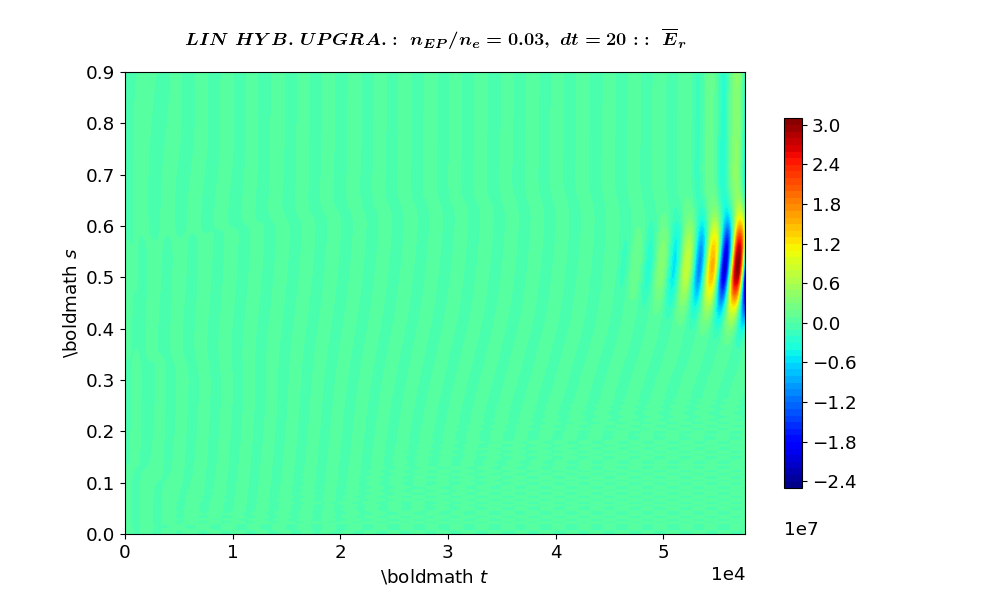

In [4]:
# *******************
# *** PLOT: (t,s) ***
# *******************
reload()

npr = 4

oo_ts = {
    'ovars': [
        ['zonal', 'erbar'], 
    ] * npr,
    'avrs': [
        ['ts']
    ] * npr,
#     'dds': [b025k_f0006, b025k_f003, b025k_f007],
    'dds': [b025hs_f003_dt10, b025hs_f003_dt20, b025hu_f003_dt10, b025hu_f003_dt20],
#     'var_legs1': ['f = 0.01'],
}

oo_ts.update({
#      't_start': 6e4,
    't_end': 5.76e4,
#      's_start': 0.4, 's_end': 0.7,
})

common.plot_vars_2d(oo_ts)

<IPython.core.display.Javascript object>


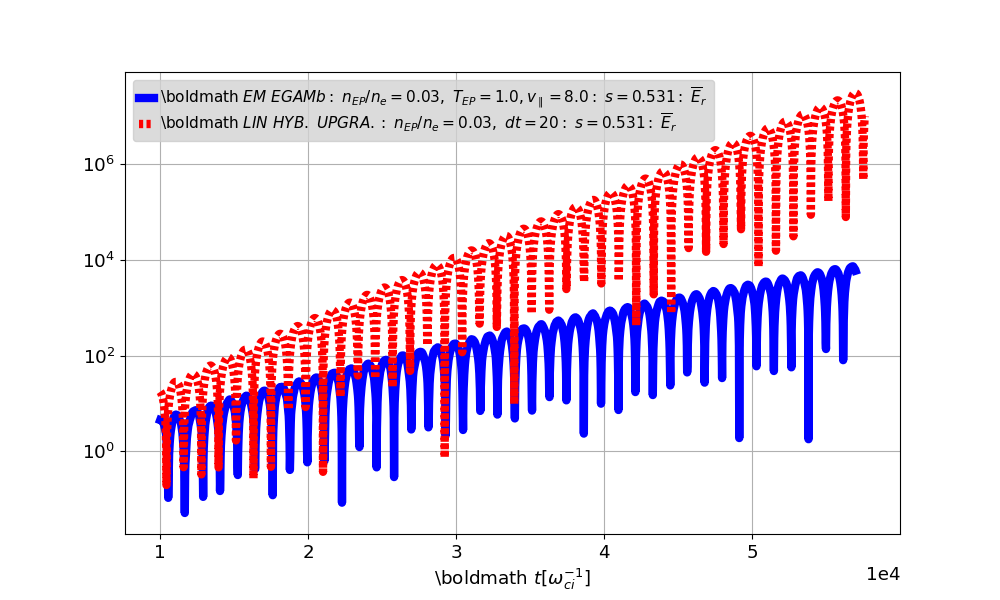

In [8]:
# ***********************
# *** PLOT: (t) at s1 ***
# ***********************
reload()

npr = 2
s1 = 0.50  # f = 0.10, 0.20
# s1 = 0.54  # f = 0.50
# s1 = 0.44  # f = 0.90-kin OR s1 = 0.57

oo_t_s1 = {
    'ovars': [
        ['zonal', 'erbar'],
    ]*npr,
    'avrs': [
#         ['ts', 'point-s', [0.48]],
#         ['ts', 'point-s', [0.53]],
#         ['ts', 'point-s', [0.60]],
        
#         ['ts', 'point-s', [0.53]],
#         ['ts', 'point-s', [0.54]],
        
#         ['ts', 'point-s', [s1]],
#         ['ts', 'point-s', [0.57]],
        
        ['ts', 'point-s', [0.53]],
        ['ts', 'point-s', [0.53]],
    ],
#     'dds': [b025k_f0006, b025k_f003, b025k_f007],
#     'dds': [b025k_f003, b025k_f005],
#     'dds': [b025hs_f003_dt10, b025hs_f003_dt20, b025hu_f003_dt10, b025hu_f003_dt20],
    'dds': [b025k_f003, b025hu_f003_dt20],
    'flag_semilogy': True,
    'stys': ['-', ':', ':', ':'],
    'labx': 't[\omega_{ci}^{-1}]',
#     'var_legs1': ['f = 0.05'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
    'x_start': 1e4, 
    'x_end': 5.76e4,
}
common.plot_vars_1d(oo_t_s1)

<IPython.core.display.Javascript object>


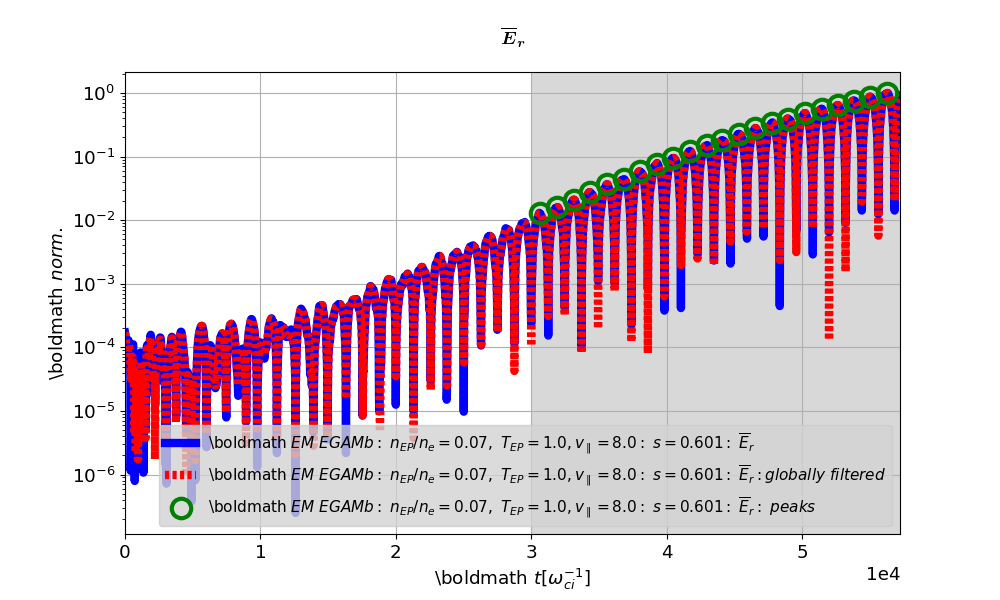

<IPython.core.display.Javascript object>


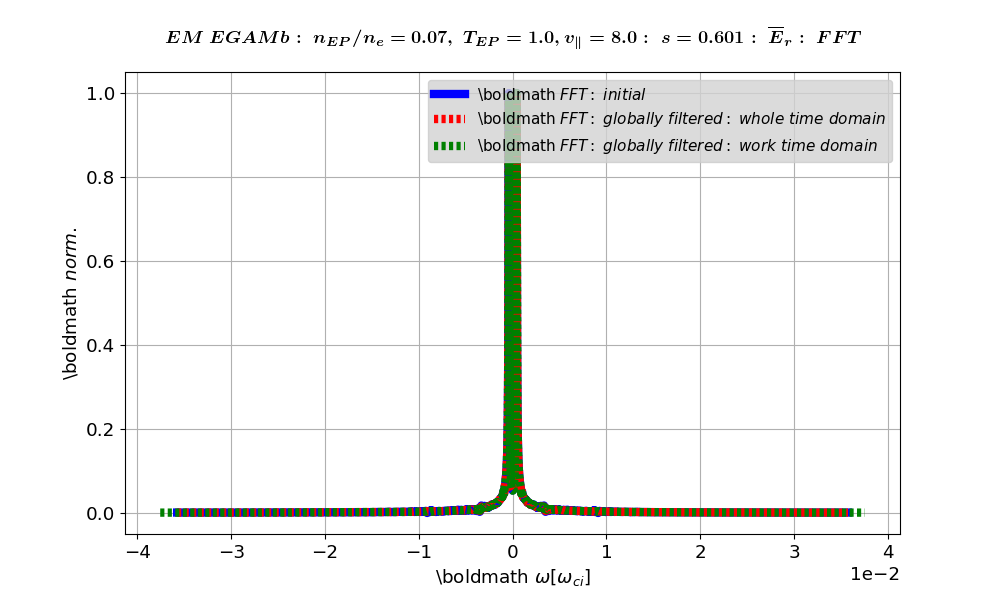

<IPython.core.display.Javascript object>


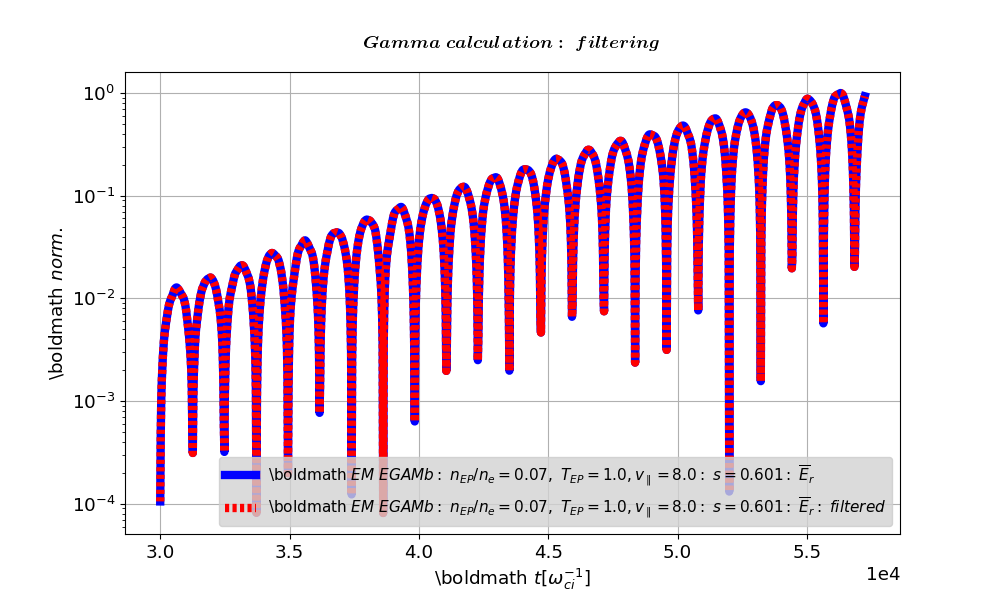

<IPython.core.display.Javascript object>


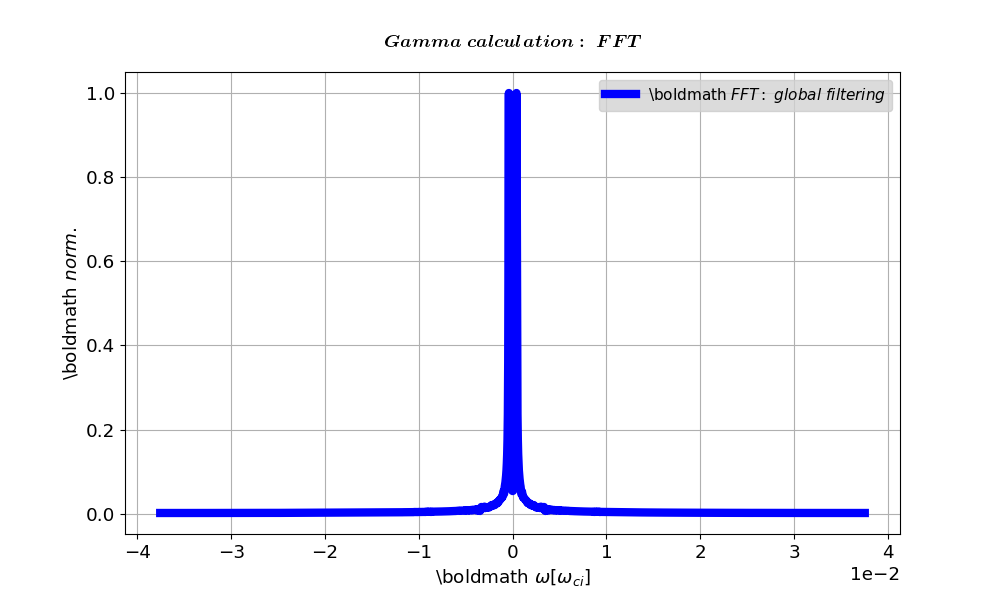

<IPython.core.display.Javascript object>


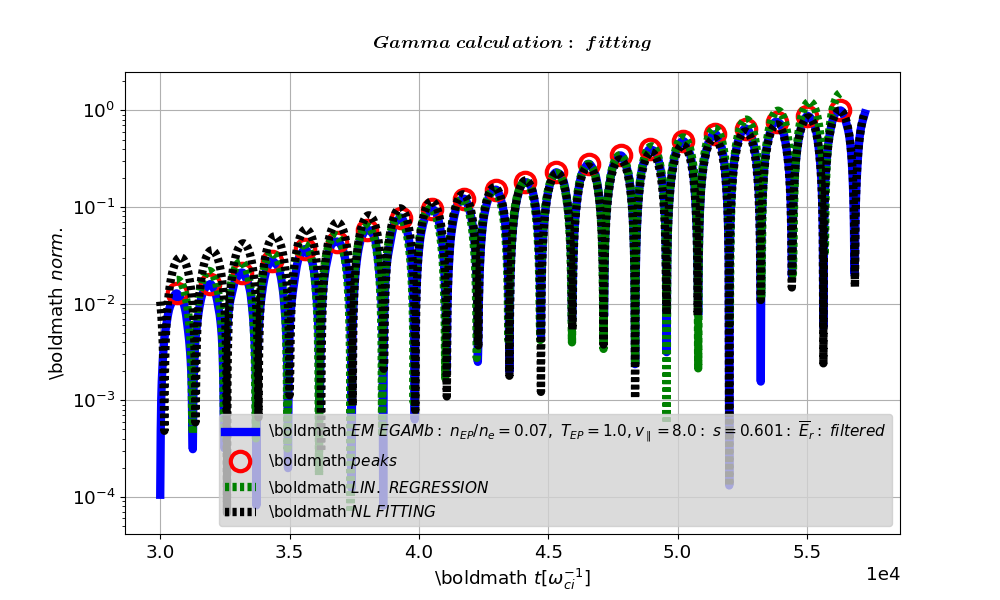

<IPython.core.display.Javascript object>


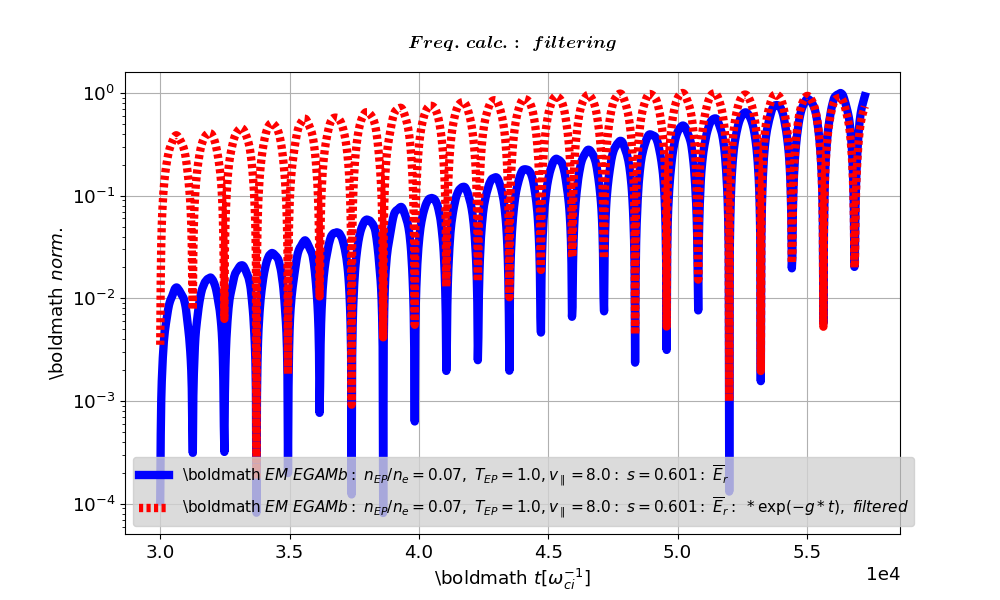

<IPython.core.display.Javascript object>


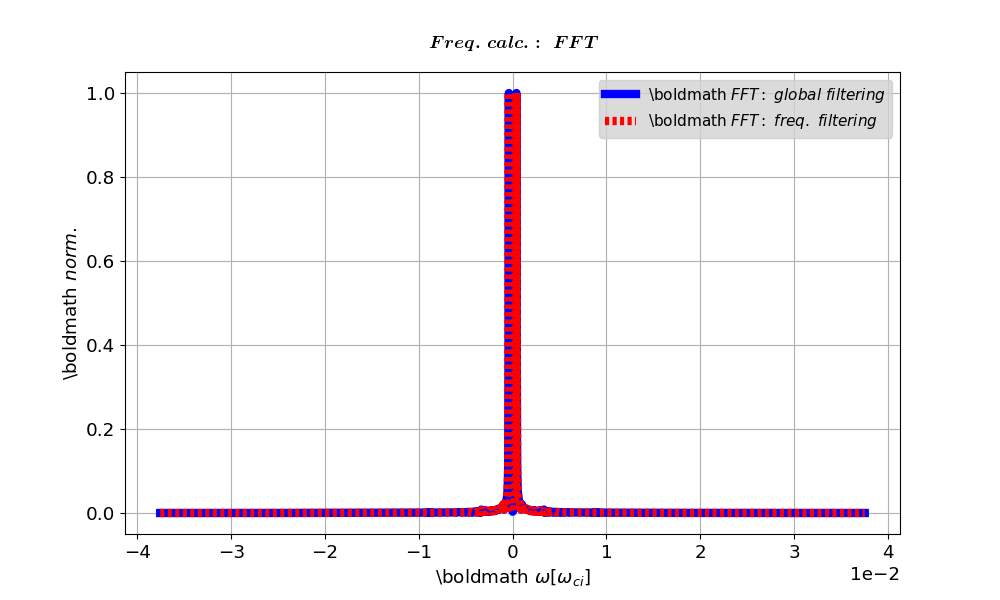

<IPython.core.display.Javascript object>


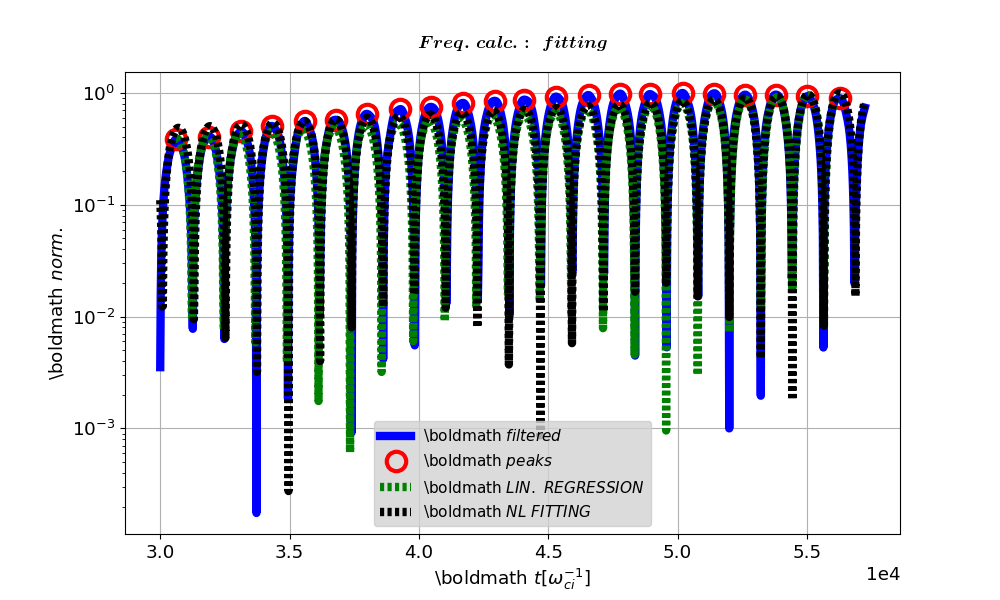

--- NAIVE CALCULATION ---
- GAMMA: ESTIMATION -
prel. w[wci] = 2.571e-03
g[wci] = 1.736e-04 +- 1.121e-05
- GAMMA: NL FITTING -
prel. w[wci] = 2.588e-03 +- 8.062e-07
g[wci] = 1.373e-04 +- 8.431e-07
- FREQUENCY: ESTIMATION -
w[wci] = 2.571e-03
(g_real - g_num)[wci] = 3.659e-05 +- 1.160e-05
- FREQUENCY: NL FITTING -
w[wci] = 2.580e-03 +- 9.453e-07
(g_real - g_num)[wci] = 2.807e-05 +- 9.762e-07
All chosen time intervals are unique.


<IPython.core.display.Javascript object>


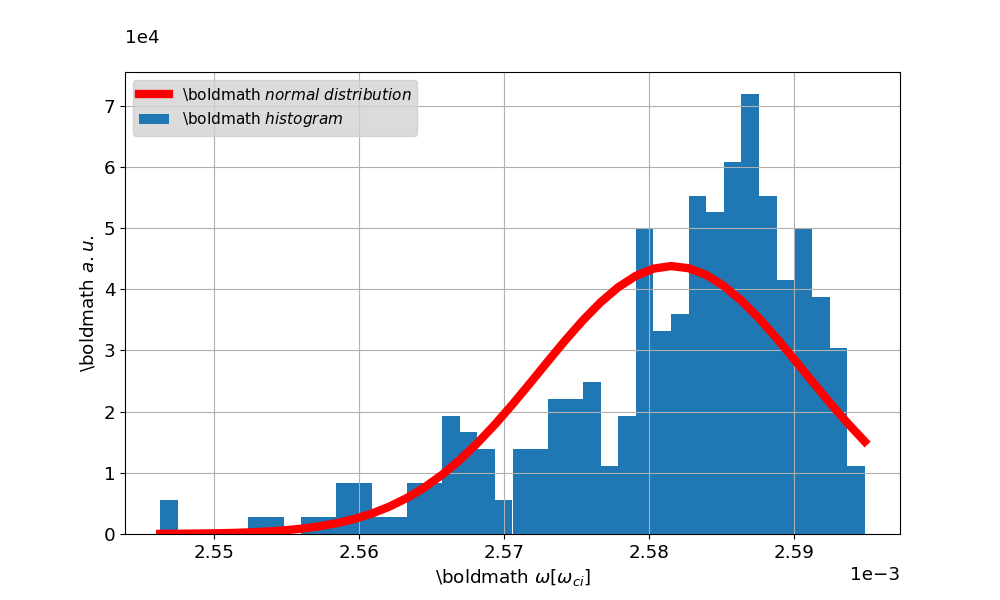

<IPython.core.display.Javascript object>


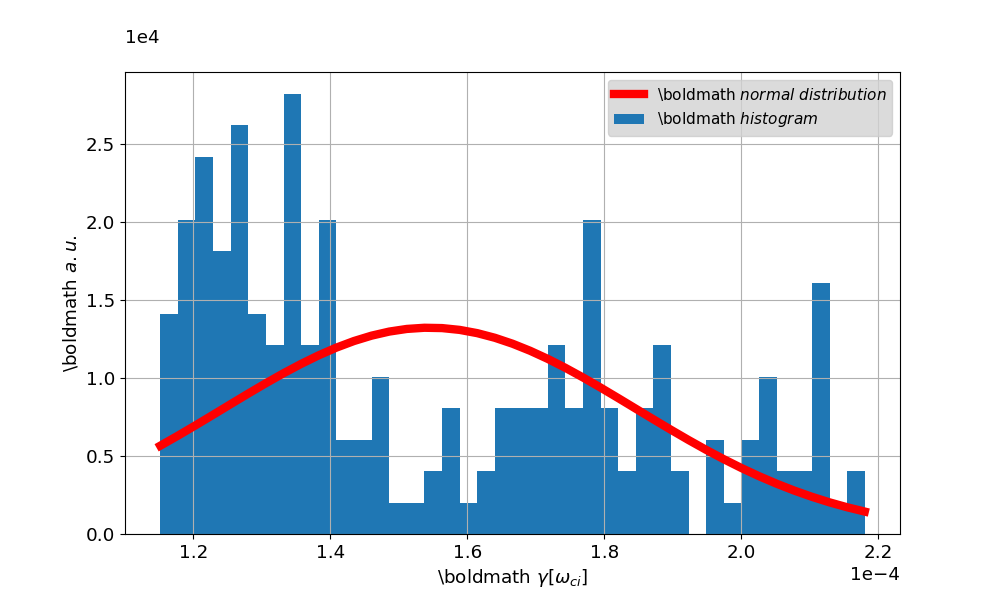

--- STATISTICS ---
number of frequency samples = 298
number of rate samples = 193
w[wci] = 2.582e-03+-1.785e-05
g[wci] = 1.545e-04+-5.912e-05


{'naive': {'w_est': 0.002571061797559846,
  'g_est': 0.00017359402212982546,
  'w_adv': 0.0025804352012915987,
  'g_adv': 0.0001373386420574791},
 'stat': {'w': 0.0025815574871089174,
  'err_w': 1.7851403350271256e-05,
  'g': 0.00015446094971963316,
  'err_g': 5.912198105715525e-05}}

In [16]:
# ***************************************************
# *** DIRECT METHOD: FIND FRQUENCY and GAMMA (s1) ***
# ***************************************************
reload()

# dd_current, s1 = dict(b025k_f0006), 0.50
# tmin, tmax = 3e4, 5.76e4

# dd_current, s1 = dict(b025k_f001), 0.50
# tmin, tmax = 3e4, 5.76e4

# dd_current, s1 = dict(b025k_f002), 0.50
# tmin, tmax = 3e4, 5.76e4

# dd_current, s1 = dict(b025k_f003), 0.53
# tmin, tmax = 3e4, 5.76e4

# dd_current, s1 = dict(b025k_f005), 0.54
# tmin, tmax = 3e4, 5.76e4

dd_current, s1 = dict(b025k_f007), 0.60
tmin, tmax = 3e4, 5.76e4

# dd_current, s1 = dict(b025k_f009), 0.40
# tmin, tmax = 3e4, 5.76e4

min_n_peaks, threshold_w, threshold_g = 4, 0.05, 0.05
n_samples = 300
sel_norm = 'wc'

filt_global = {
    'sel_filt': 'smooth', 
    'wind': 7, 
}
filt_freq = {
    'sel_filt': 'smooth', 
    'wind': 7, 
}

oo_var = {
    'ovars': [['zonal', 'erbar']],
    'avrs': [['ts', 'point-s', [s1]]],
    'dds': [dd_current],
#     'sel_legs1': 'woPr',
}

oo_wg = {
    # BASIC
    't_work': [tmin, tmax], 
    'flag_two_stages': True,
#     'sel_norm': 'vt',
    # FILTERING
    'filt_global': filt_global, 
    'filt_freq':   filt_freq,
    # STATISTICS
    'flag_stat':   True,
    'n_samples':   n_samples,
    'min_n_peaks': min_n_peaks,
    'threshold_w': threshold_w,
    'threshold_g': threshold_g,
    'sel_norm': sel_norm,
}

oo_plot = {
#     't_plot': [0.15e4, 1.5e4],
    'flag_norm': True,
    'flag_semilogy': True
}

common.calc_wg(oo_var, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


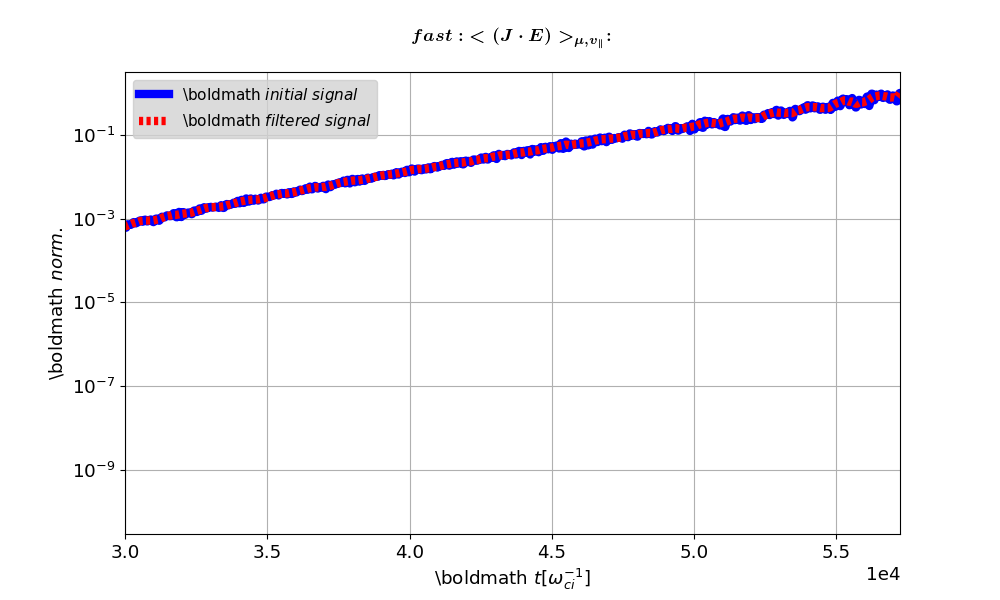

<IPython.core.display.Javascript object>


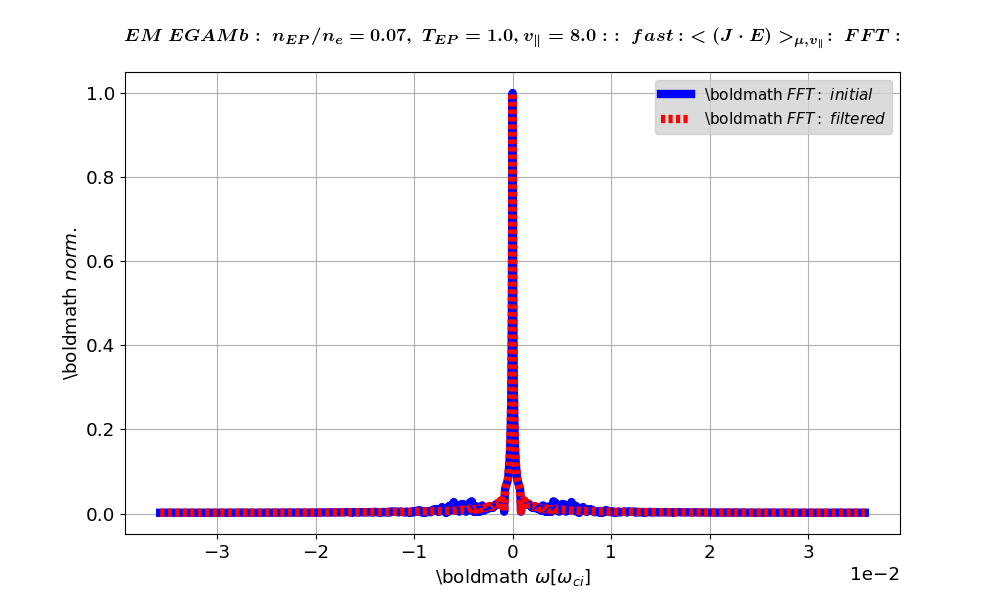

<IPython.core.display.Javascript object>


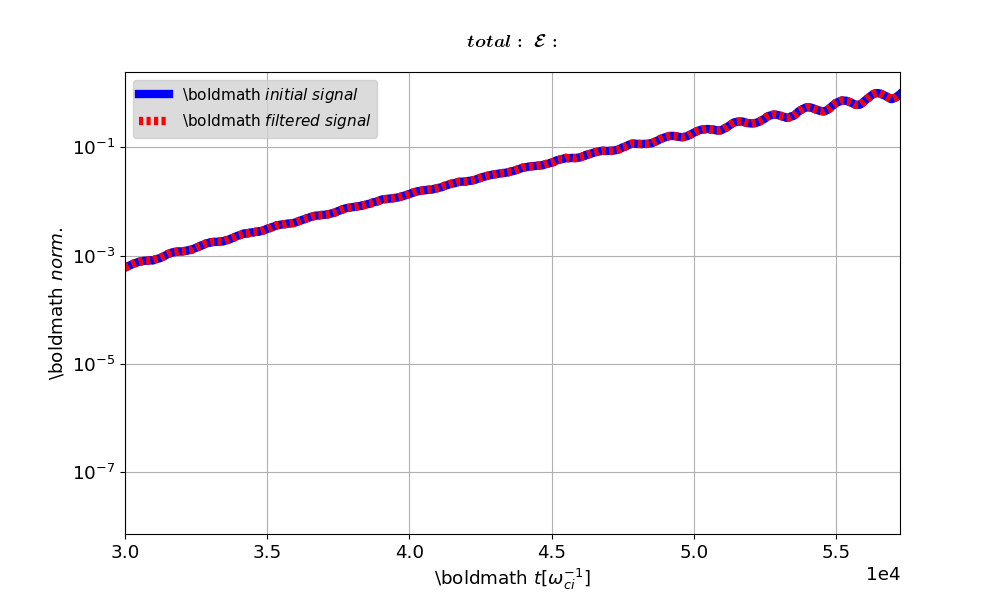

<IPython.core.display.Javascript object>


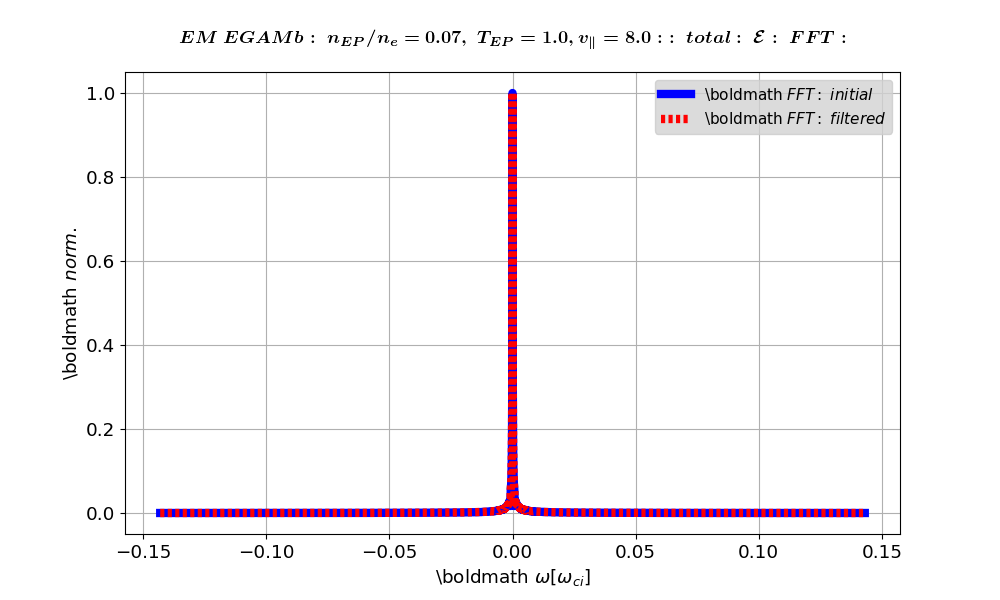

<IPython.core.display.Javascript object>


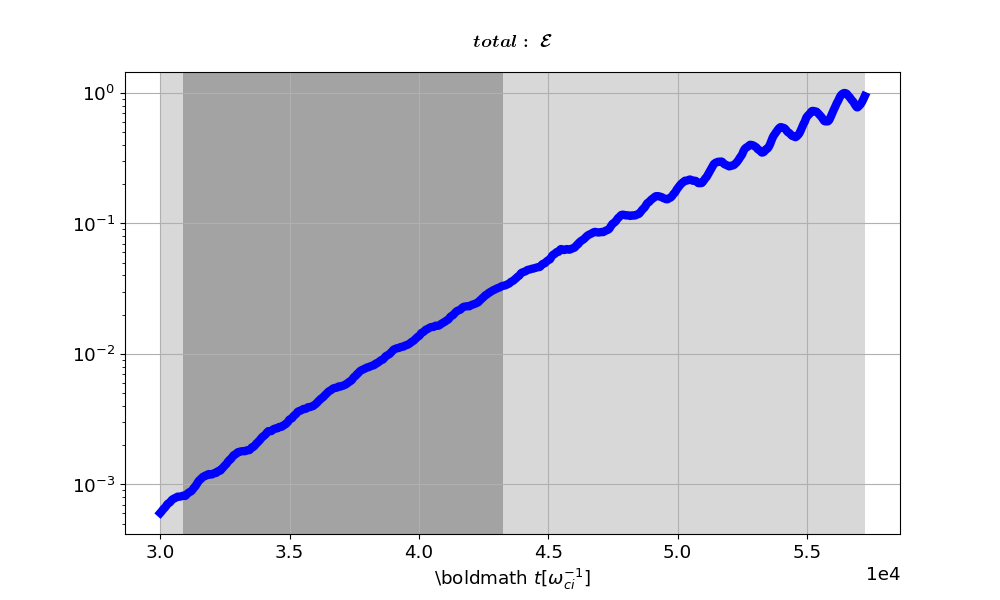

<IPython.core.display.Javascript object>


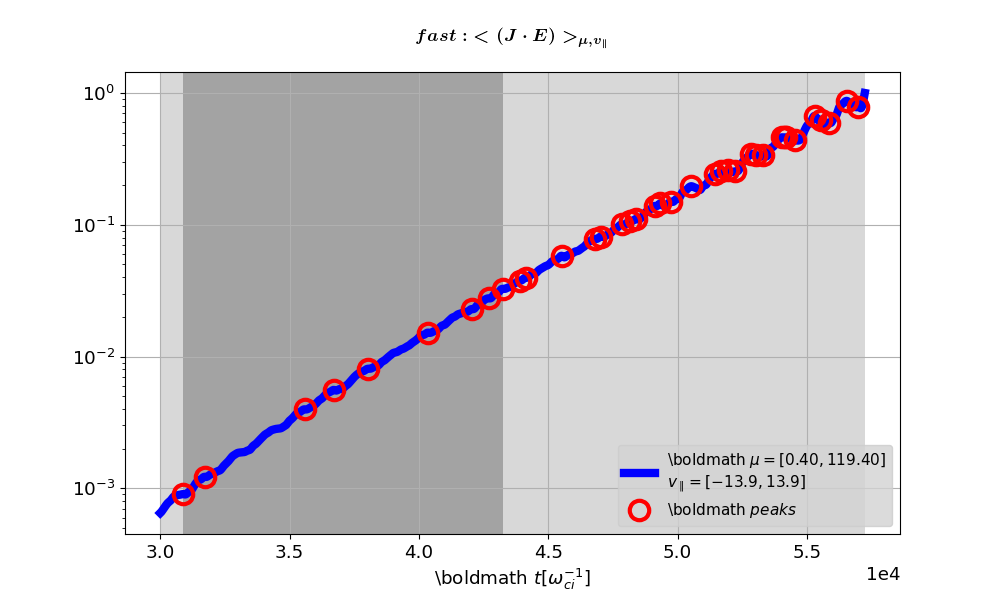

All chosen time intervals are unique.


<IPython.core.display.Javascript object>


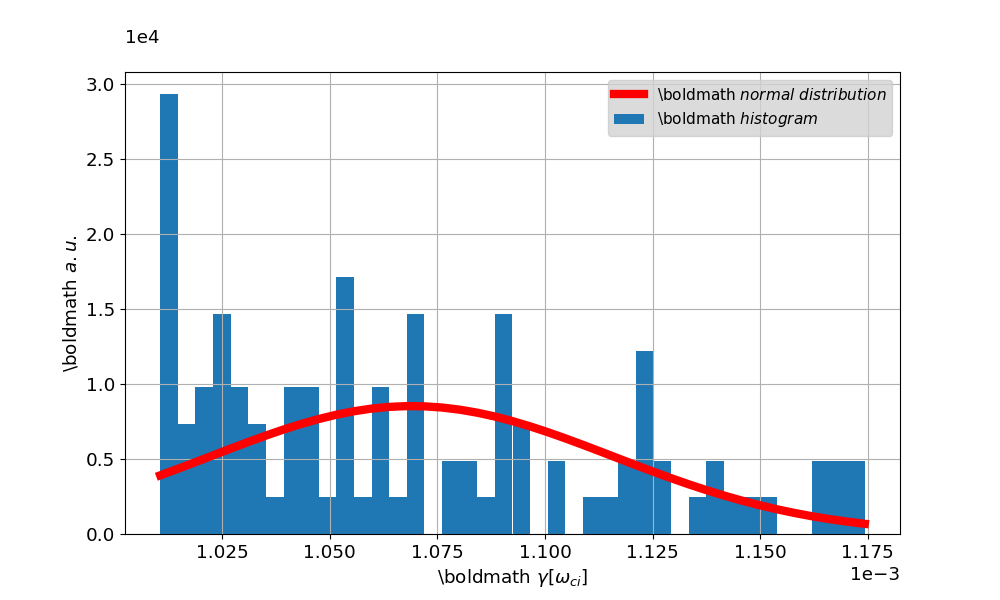

velocity domain: \mu = [0.40, 119.40]$
$ v_{\parallel} = [-13.9, 13.9]
fast: Initial: g[wci] = 1.162e-03
fast: Statistics: g[wci] = 1.069e-03+-9.174e-05



In [25]:
# ***********
# *** MPR ***
# ***********
reload()

gam_g = None

# species_name, flag_inv_peaks = 'total', True
# species_name, flag_inv_peaks = 'deuterium', False
# species_name, flag_inv_peaks = 'electrons', False
species_name, flag_inv_peaks = 'fast', True

# dd_current, gam_w = dict(b025k_f0006), 2.934e-03
# tmin, tmax = 3e4, 5.76e4

# dd_current, gam_w = dict(b025k_f001), 2.870e-03
# tmin, tmax = 3e4, 5.76e4

# dd_current, gam_w = dict(b025k_f002), 2.767e-03
# tmin, tmax = 3e4, 5.76e4

# dd_current, gam_w = dict(b025k_f003), 2.689e-03
# tmin, tmax = 3e4, 5.76e4

# dd_current, gam_w = dict(b025k_f005), 2.607e-03
# tmin, tmax = 3e4, 5.76e4

dd_current, gam_w = dict(b025k_f007), 2.582e-03
tmin, tmax = 3e4, 5.76e4

# dd_current, gam_w = dict(b025k_f009), 2.605e-03
# tmin, tmax = 3e4, 5.76e4

n_samples, min_gam_n_periods = 100, 4
filt_je_one = {'sel_filt': 'smooth', 'wind': 7}
filt_ef_one = {'sel_filt': 'smooth', 'wind': 7}
filt_er = {'sel_filt': 'smooth', 'wind': 7}

flag_ZFZF = False
gam_s1 = 0.50
zfzf_t1 = 1e4
id_efield_peak = 10

oo_vars = {
    'sel_species': species_name,
}

oo_wg = {
    't_work': [tmin, tmax],
    'flag_naive_t_peaks': True,
    'naive_n_periods': 4,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    # FILTERING
    'filt_je': [filt_je_one] * 3,
    'filt_ef': [filt_ef_one] * 3,
    # To exclude ZFZF deom J*E and Efield
    'flag_ZFZF': flag_ZFZF,
    'gam-s1':  gam_s1,
    'zfzf-t1': zfzf_t1,
    'gam-g':   gam_g,
    'id-efield-peak': id_efield_peak,
    'filt_er': filt_er,
    # calculate confidence intervals
    'flag_stat': True,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}

oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': True,
    'flag_semilogy': True,
}

common.MPR_gamma(dd_current, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


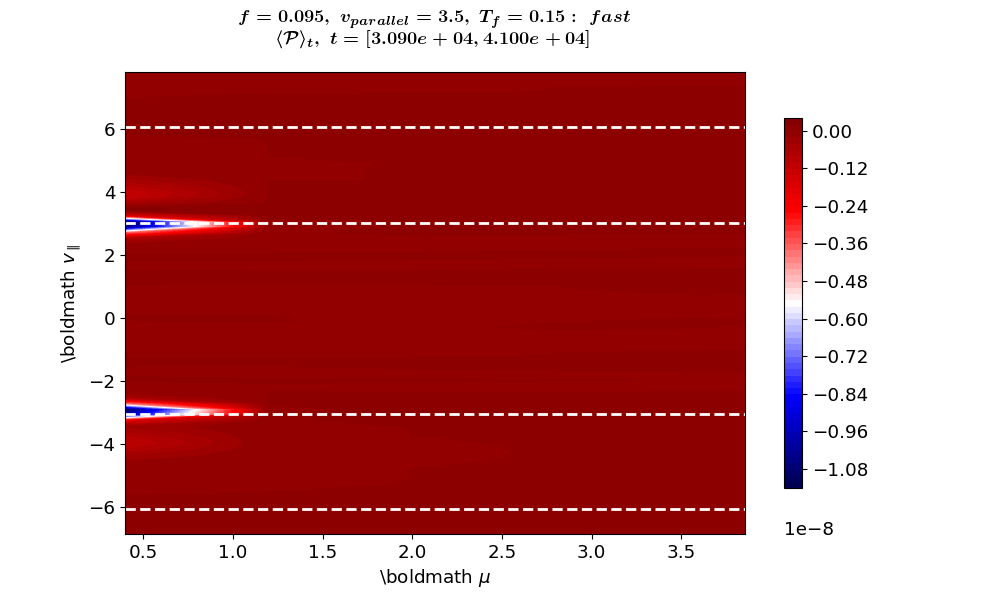

In [84]:
# *********************
# *** MPR: VELOCITY ***
# *********************
reload()

# species_name, flag_inv_peaks = 'deuterium', False
species_name, flag_inv_peaks = 'fast', True
# species_name, flag_inv_peaks = 'electrons', False



# s1 = 0.50
# dd_current, gam_w, tit_proj = dict(b025k_f001), 2.870e-03, \
#     'f = 0.01,\ v_{parallel} = 8.0,\ T_f = 1.0:\ '

s1 = 0.50
dd_current, gam_w, tit_proj = dict(b025k_v35_T015), 2.870e-03, \
    'f = 0.095,\ v_{parallel} = 3.5,\ T_f = 0.15:\ '
    



t_int_start, t_int_end = 3.09e4, 4.1e4 
tmin, tmax = 3e4, 8e4  
n_samples, min_gam_n_periods = 100, 3

n_vpar_res = 2
# mu_plot, vpar_plot = [0, 1.5e3], [-34, 34]
mu_plot, vpar_plot = [], []
tit_vmu = [
    tit_proj + species_name, '\langle\mathcal{P}\\rangle_{t},\ ' +  
    't = [{:0.3e}, {:0.3e}]'.format(t_int_start, t_int_end)
]

oo_wg = {
    # work and calculation time domain
    't_work': [tmin, tmax], 
    'flag_naive_t_peaks': False,
    'naive_n_periods': 4,
    'flag_inv_peaks': flag_inv_peaks,
    'gam-w': gam_w,  # normalization is always [wc]
    's1': s1,
    # calculate confidence intervals
    'flag_stat': False,
    'n_samples': n_samples,
    'min_gam_n_periods': min_gam_n_periods,
}
oo_plot = {
    't_plot': oo_wg['t_work'],
    'flag_norm': False,
    'flag_semilogy': True,
    'flag_pass_trap_cone': False,
    'mu_plot': mu_plot, 'vpar_plot': vpar_plot,
    'n_vpar_res' : n_vpar_res,
    'tit_vmu': tit_vmu,
}
oo_vars = {
    'sel_species': species_name,
    't_int': [t_int_start, t_int_end]
}

common.MPR_gamma_velocity_domains(dd_current, {}, oo_vars, oo_wg, oo_plot)

<IPython.core.display.Javascript object>


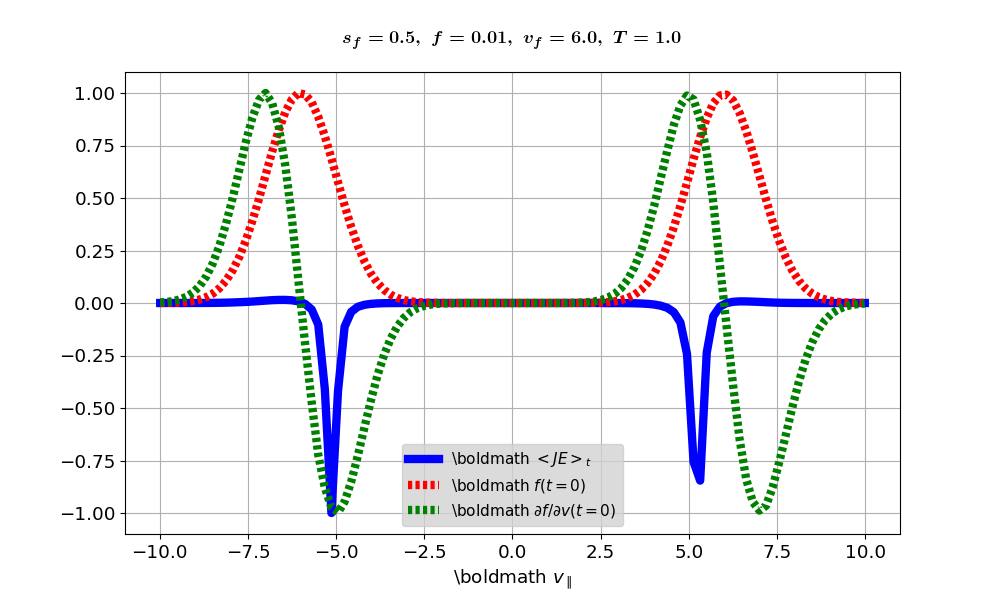

In [59]:
# **************************
# *** PLOT: <JE(vpar)>_t ***
# **************************
reload()

species_name = 'fast'

# dd_current, tit_plot = dict(b025_v6_T04), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.4:\ ' + species_name
# dd_current, tit_plot = dict(b025_v6_T06), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.6:\ ' + species_name
# dd_current, tit_plot = dict(b025_v6_T08), 's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 0.8:\ ' + species_name
dd_current, tit_plot = dict(b025_v6_T1),  's_f = 0.5,\ f = 0.01,\ v_f = 6.0,\ T = 1.0:\ ' + species_name

t_av = [3.1e4, 7.9e4]

oo_vpar = {
    'ovars': [
        ['mpr',                    'je', species_name],
        ['distribution',     'f_vel_1d', species_name],
        ['distribution', 'df_vel_1d-dv', species_name],
    ],
    'avrs': [
        ['tvpar', 'mean-t', [t_av]],
        ['tvpar', 'point-t', [0.0]],
        ['tvpar', 'point-t', [0.0]],
    ],
    'dds': [dd_current]*3,
    'stys': ['-', ':', ':'],
    'labx': 'v_{\parallel}',
    'var_legs1': ['<JE>_t'],
    'var_legs2': ['f(t=0)'],
    'var_legs3': ['\partial f/\partial v (t=0)'],
#     'var_legs2': ['dt=10'],
#     'var_legs3': ['dt=20'],
     'x_start': -10, 'x_end': 10,
    'flag_norm': True,
    'tit_plot': tit_plot
}
common.plot_vars_1d(oo_vpar)

In [27]:
from ip_projects import NLED_scans

<IPython.core.display.Javascript object>


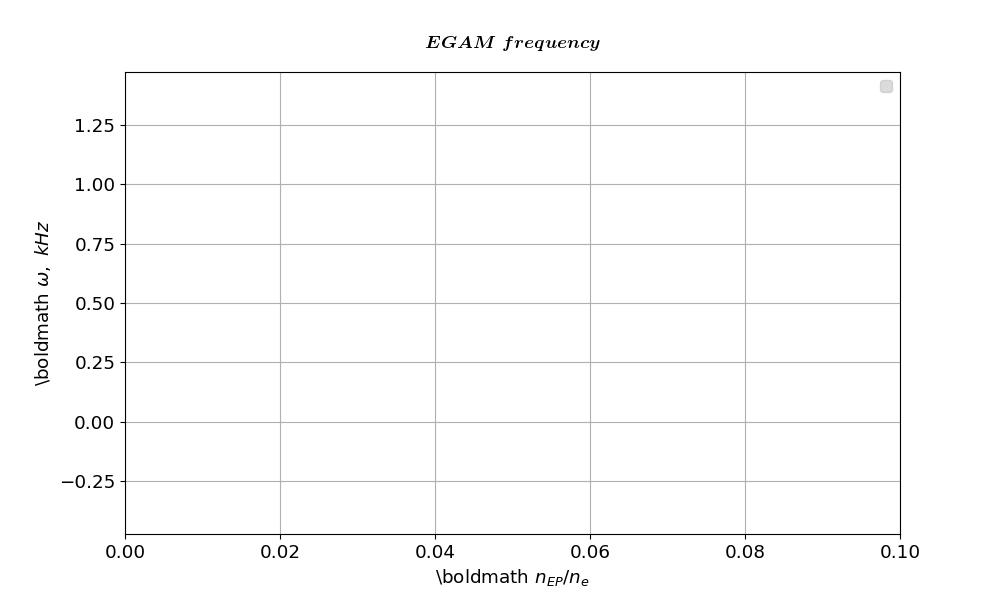

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


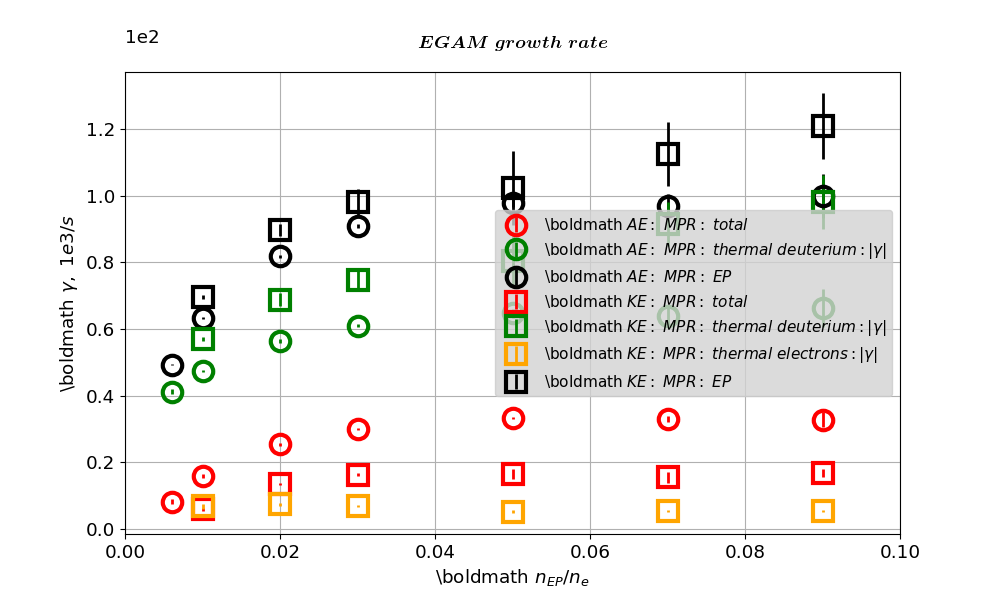

In [28]:
# **********************
# *** SCAN ON F_PART ***
# **********************
mix.reload_module(NLED_scans)
NLED_scans.egam_fpart_scan_rho025({'sel_norm': 'khz', 'dd': b025k_f001})

In [1]:
1./0.000272

3676.470588235294